
# TSA: Assignment 1

- Sampad Kumar Kar
- MCS202215
- sampadk04@cmi.ac.in

# Imports

In [52]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [11]:
# in all the problems we consider upto a lag of 20
max_lag = 20

# MA Problems

## Problem 1

We are provided with the follwing MA(1) model:

$x_t = 10 + w_t + 0.7w_{t-1}$, where $w_t \stackrel{iid}{\sim} N(0,1)$

The theoritical ACF for a MA(1) model is given by:

$\rho_1 = \dfrac{\theta_1}{1 + \theta_1^2}, \rho_h = 0$ for $h \geq 2$

For the given model, this boils down to:

$\rho_1 = \dfrac{0.7}{1 + 0.7^2} = \dfrac{0.7}{0.51} \approx 0.47$

Therefore, the theoritical ACF is 0.47

Now, we plot the ACF.

In [20]:
# creating acfs
acfs = [1, 0.7/((1+(0.7)**2))]
acfs.extend([0 for _ in range(max_lag-1)])

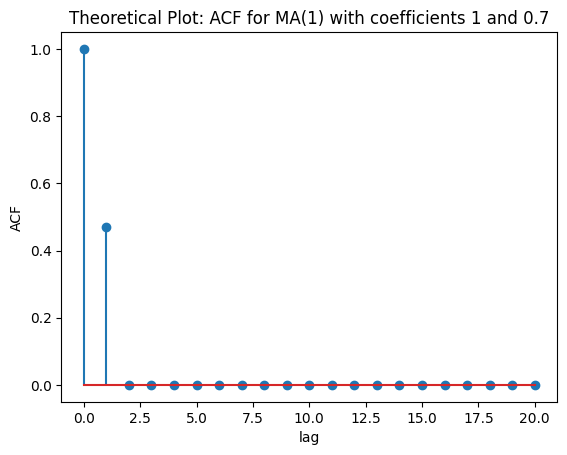

In [21]:
# plotting acfs
plt.figure()
plt.stem(acfs)
plt.title("Theoretical Plot: ACF for MA(1) with coefficients 1 and 0.7")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Now, we check our theoretical estimations on randomly generated samples and plotting their ACFs, for different sample sizes.

### `n_samples = 100`

In [17]:
# generating 100 observations for the above model
n_samples = 100

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.7

samples_100 = ArmaProcess([theta_0], [theta_0, theta_1]).generate_sample(nsample=n_samples)

# adding the mean
samples_100 += [mu for _ in range(n_samples)]

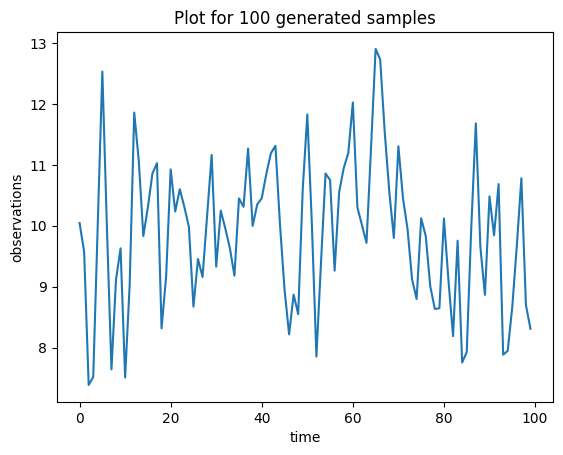

In [19]:
# plotting the samples
plt.figure()
plt.plot(samples_100)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

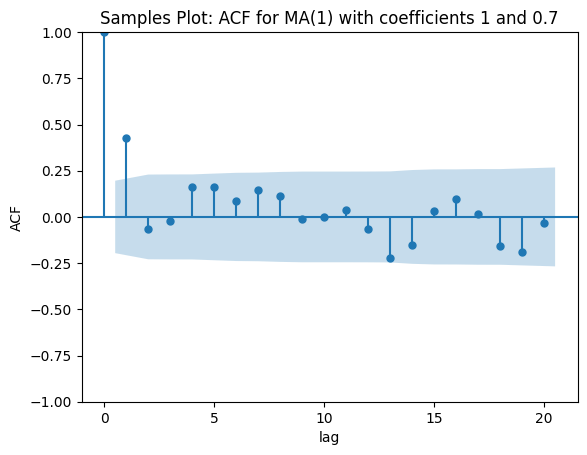

In [23]:
# plotting ACF for the samples
plot_acf(samples_100, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(1) with coefficients 1 and 0.7")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

As expected, apart from ACF at `lag=0` and `lag=1`, ACF at rest of the lags are close to `0`.

### `n_samples = 200`

In [24]:
# generating 200 observations for the above model
n_samples = 200

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.7

samples_200 = ArmaProcess([theta_0], [theta_0, theta_1]).generate_sample(nsample=n_samples)

# adding the mean
samples_200 += [mu for _ in range(n_samples)]

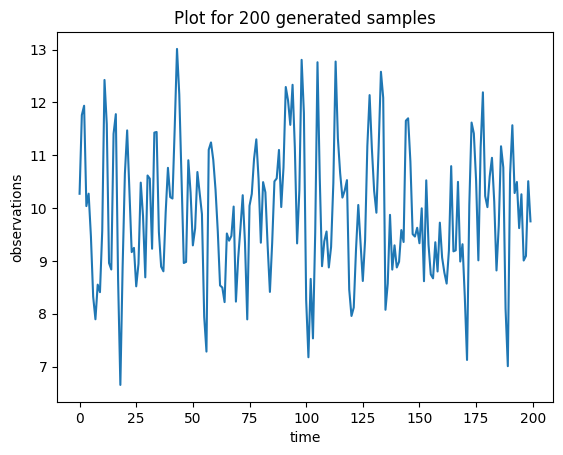

In [25]:
# plotting the samples
plt.figure()
plt.plot(samples_200)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

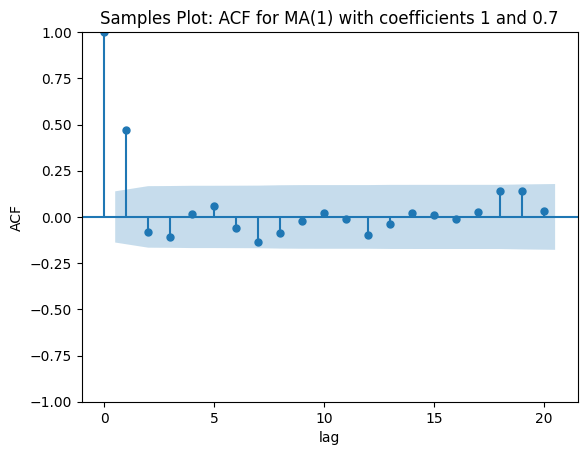

In [26]:
# plotting ACF for the samples
plot_acf(samples_200, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(1) with coefficients 1 and 0.7")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Again, as expected apart from ACF at `lag=0` and `lag=1`, ACF at rest of the lags are close to `0`.

### `n_samples=500`

In [28]:
# generating 500 observations for the above model
n_samples = 500

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.7

samples_500 = ArmaProcess([theta_0], [theta_0, theta_1]).generate_sample(nsample=n_samples)

# adding the mean
samples_500 += [mu for _ in range(n_samples)]

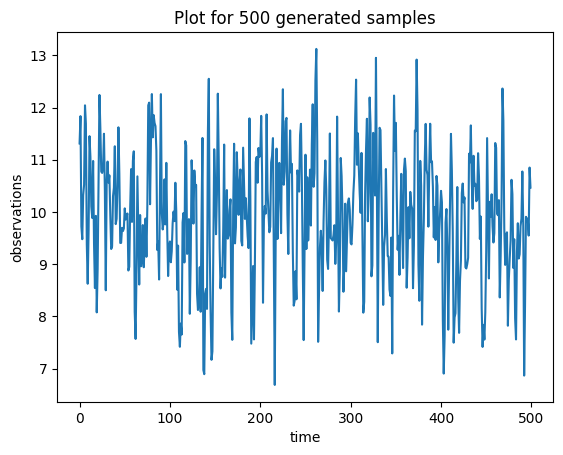

In [29]:
# plotting the samples
plt.figure()
plt.plot(samples_500)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

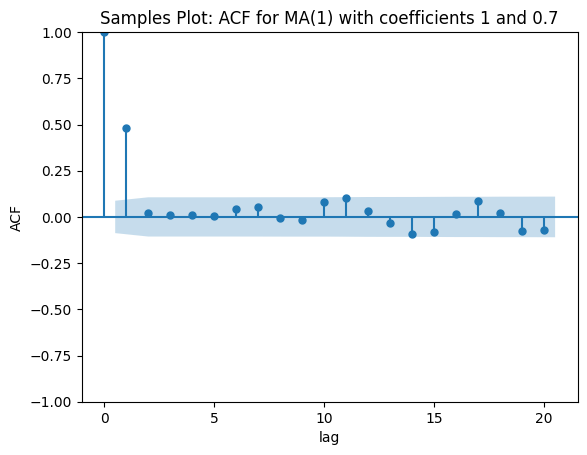

In [30]:
# plotting ACF for the samples
plot_acf(samples_500, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(1) with coefficients 1 and 0.7")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Again, as expected apart from ACF at `lag=0` and `lag=1`, ACF at rest of the lags are close to `0`.

## Problem 2

We are provided with the follwing MA(2) model:

$x_t = 10 + w_t + 0.5w_{t-1} + 0.3w_{t-2}$, where $w_t \stackrel{iid}{\sim} N(0,1)$

The theoritical ACF for a MA(2) model is given by:

$\rho_1 = \dfrac{\theta_1 + \theta_1 \cdot \theta_2}{1 + \theta_1^2 + \theta_2^2}, \rho_2 = \dfrac{\theta_2}{1 + \theta_1^2 + \theta_2^2}, \rho_h = 0$ for $h \geq 3$

For the given model, this boils down to:

$\rho_1 = \dfrac{0.5 + 0.5 \cdot 0.3}{1 + 0.5^2 + 0.3^2} \approx 0.48$

$\rho_2 = \dfrac{0.3}{1 + 0.5^2 + 0.3^2} \approx 0.22$

$\rho_i = 0$ $\forall$ $i > 2$

Now, we plot the ACF.

In [36]:
# creating acfs
acfs = [1,(0.5 + (0.3*0.5))/(1+(0.5**2) + (0.3**2)),0.3/(1+(0.5**2) + (0.3**2))]
acfs.extend([0 for _ in range(max_lag-1)])

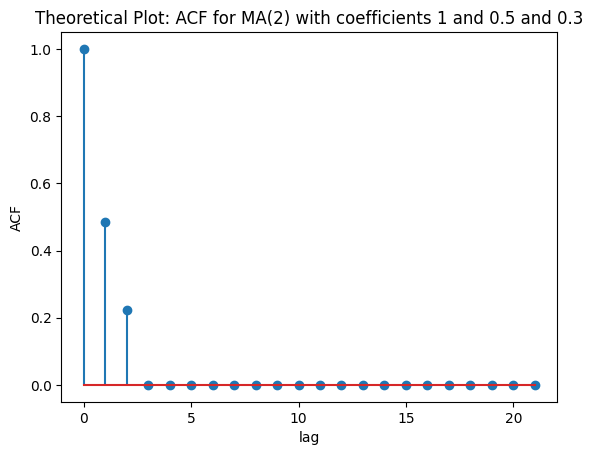

In [37]:
# plotting acfs
plt.figure()
plt.stem(acfs)
plt.title("Theoretical Plot: ACF for MA(2) with coefficients 1 and 0.5 and 0.3")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Now, we check our theoretical estimations on randomly generated samples and plotting their ACFs, for different sample sizes.

### `n_samples = 150`

In [38]:
# generating 150 observations for the above model
n_samples = 150

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.5
theta_2 = 0.3

samples_150 = ArmaProcess([theta_0], [theta_0, theta_1, theta_2]).generate_sample(nsample=n_samples)

# adding the mean
samples_150 += [mu for _ in range(n_samples)]

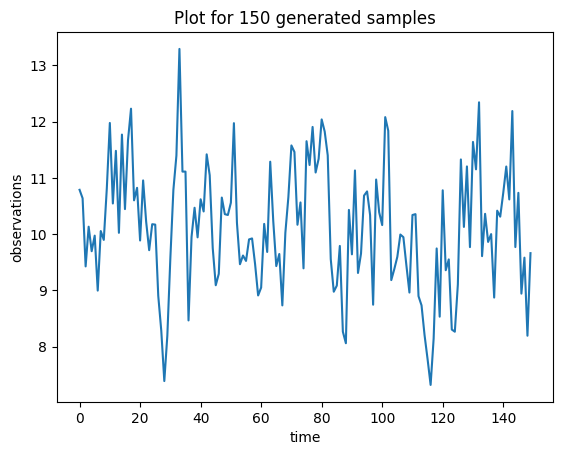

In [39]:
# plotting the samples
plt.figure()
plt.plot(samples_150)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

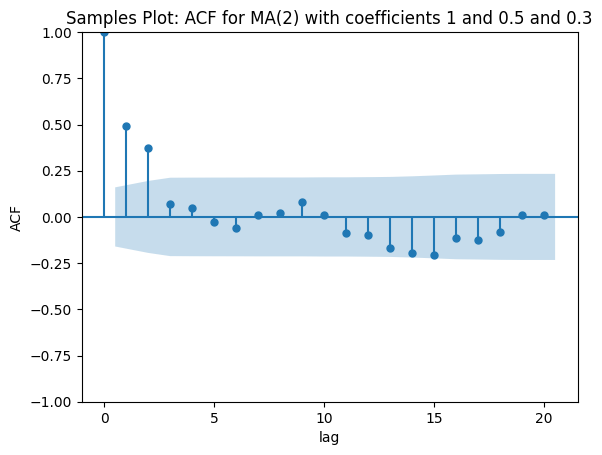

In [40]:
# plotting ACF for the samples
plot_acf(samples_150, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(2) with coefficients 1 and 0.5 and 0.3")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

As expected, apart from ACF at `lag=0`, `lag=1` and `lag=2`, ACF at rest of the lags are close to `0`.

### `n_samples = 200`

In [41]:
# generating 200 observations for the above model
n_samples = 200

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.5
theta_2 = 0.3

samples_200 = ArmaProcess([theta_0], [theta_0, theta_1, theta_2]).generate_sample(nsample=n_samples)

# adding the mean
samples_200 += [mu for _ in range(n_samples)]

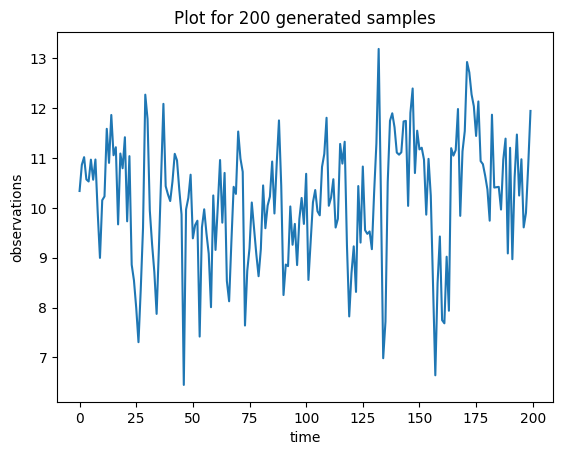

In [42]:
# plotting the samples
plt.figure()
plt.plot(samples_200)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

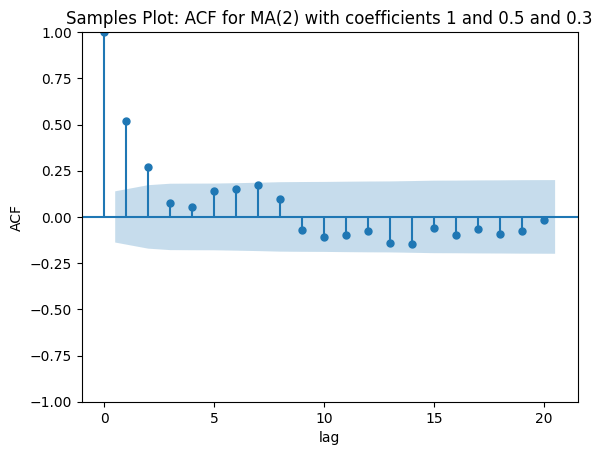

In [43]:
# plotting ACF for the samples
plot_acf(samples_200, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(2) with coefficients 1 and 0.5 and 0.3")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Again, as expected apart from ACF at `lag=0`, `lag=1` and `lag=2`, ACF at rest of the lags are close to `0`.

### `n_samples = 250`

In [44]:
# generating 150 observations for the above model
n_samples = 250

# define the parameters
mu = 10
theta_0 = 1
theta_1 = 0.5
theta_2 = 0.3

samples_250 = ArmaProcess([theta_0], [theta_0, theta_1, theta_2]).generate_sample(nsample=n_samples)

# adding the mean
samples_250 += [mu for _ in range(n_samples)]

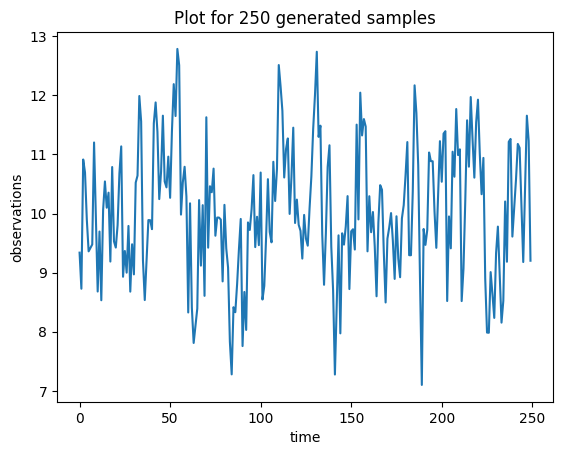

In [45]:
# plotting the samples
plt.figure()
plt.plot(samples_250)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

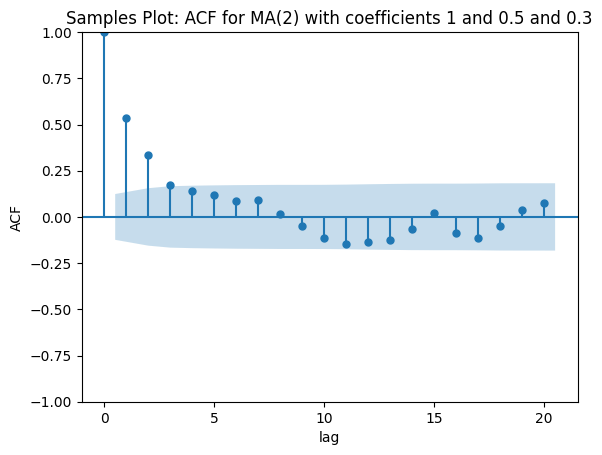

In [46]:
# plotting ACF for the samples
plot_acf(samples_250, lags = range(max_lag+1))
plt.title("Samples Plot: ACF for MA(2) with coefficients 1 and 0.5 and 0.3")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

Again, as expected apart from ACF at `lag=0`, `lag=1` and `lag=2`, ACF at rest of the lags are close to `0`.

# AR Problems

## Problem 3

![](https://i.postimg.cc/cCr4NmbD/image.png)

Features of the above time series data:
- There are no obvious trend present in the data.
- There are no seasonality present in the data.
- If we assume 'Stationarity' of the given data, then we can make the following inferences:
    - Mean is approximately 20.2.
    - Variance is very high.

# Problem 4

Based on the given data above, we are given an `AR(1)` model for one missing data as:

$x_t = 9.19 + 0.543 \cdot x_{t-1}$

We first, simulate the 99 data points based on the above AR(1) model.

In [47]:
# generating 99 observations for the above model
n_samples = 99

# define the parameters
mu = 9.19
theta_0 = 0.543

samples = ArmaProcess([1, theta_0], [1]).generate_sample(nsample=n_samples)

# adding the mean
samples += [mu for _ in range(n_samples)]

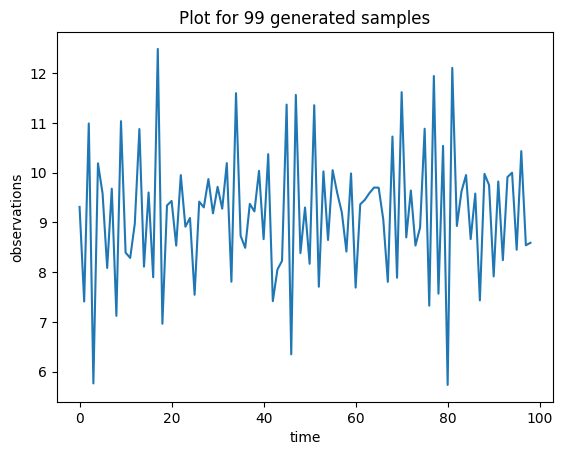

In [48]:
# plotting the samples
plt.figure()
plt.plot(samples)
plt.title("Plot for " + str(n_samples) + " generated samples")
plt.xlabel("time")
plt.ylabel("observations")
plt.show()

Now, we fit an `AR(1)` on the simulated data.

In [53]:
# initializing AR(1) / ARIMA(1,0,0) model
model = ARIMA(samples, order=(1, 0, 0))
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   99
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -139.596
Date:                Mon, 13 Mar 2023   AIC                            285.192
Time:                        17:42:52   BIC                            292.978
Sample:                             0   HQIC                           288.342
                                 - 99                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.1834      0.062    149.288      0.000       9.063       9.304
ar.L1         -0.6522      0.073     -8.920      0.000      -0.796      -0.509
sigma2         0.9769      0.154      6.334      0.0

Note: The coefficient at `lag=1` is `-0.6522`, which is quite far from `0` at `alpha=0.05`

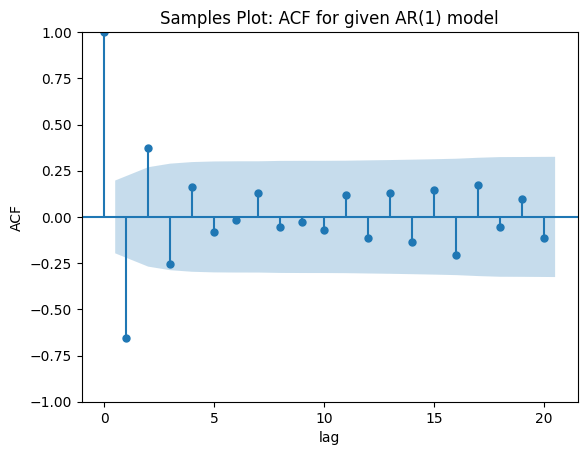

In [54]:
# plotting ACF
plot_acf(samples, lags = range(max_lag+1), alpha=0.05)
plt.title("Samples Plot: ACF for given AR(1) model")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.show()

We can observe that the AutoCorrelation Function follows closely $\rho_i = \phi^i$ , $i=0,1,2,..$, where $\phi = -0.6522$, which is the coefficient at `lag=1`.

Also, at $5%$ LOS, the ACF is close to `0` after `lag=0` and `lag=1`.